<a href="https://colab.research.google.com/github/dudinkasg/Bootcamp_TurmaNoite/blob/main/Final_Projeto_Aprendizado_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 #Importando dados
 url = '/content/drive/MyDrive/Infnet - Bootcamp/winequalityN.csv'

In [4]:
#Lendo os dados com pandas
df = pd.read_csv(url)

In [5]:
#Verificando os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.shape

(6497, 13)

In [8]:
df.groupby('type').size()

type
red      1599
white    4898
dtype: int64

In [9]:
df_white = df[df['type'] == 'white']

In [10]:
df_white.shape

(4898, 13)

In [11]:
#### Verifica se tem duplicatas no Dataframe ###3
df_white[df_white.duplicated()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
39,white,7.3,0.24,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.600000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,white,6.4,0.23,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,white,7.0,0.36,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,white,6.4,0.33,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,white,7.1,0.23,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [12]:
df_white.drop_duplicates(inplace= True)

<ipython-input-12-61eb911afbad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white.drop_duplicates(inplace= True)


In [13]:
df_white.shape

(3970, 13)

In [14]:
df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)

<ipython-input-14-ee8936261a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)


In [15]:
df_white.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1


In [16]:
df_white_alt = df_white.drop('quality', axis=1)

In [17]:
df_white_alt.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


In [18]:
df_white_alt.isna().sum()

type                    0
fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
opinion                 0
dtype: int64

In [19]:
#### Substituir os valores vazios das colunas pela média dos valores contidos em cada coluna
df_white_alt['fixed acidity'] = df_white_alt['fixed acidity'].fillna(df_white_alt['fixed acidity'].mean().round(1))
df_white_alt['volatile acidity'] = df_white_alt['fixed acidity'].fillna(df_white_alt['volatile acidity'].mean().round(1))
df_white_alt['citric acid'] = df_white_alt['citric acid'].fillna(df_white_alt['citric acid'].mean().round(1))
df_white_alt['residual sugar'] = df_white_alt['residual sugar'].fillna(df_white_alt['residual sugar'].mean().round(1))
df_white_alt['chlorides'] = df_white_alt['chlorides'].fillna(df_white_alt['chlorides'].mean().round(1))
df_white_alt['pH'] = df_white_alt['pH'].fillna(df_white_alt['pH'].mean().round(1))
df_white_alt['sulphates'] = df_white_alt['sulphates'].fillna(df_white_alt['sulphates'].mean().round(1))

In [20]:
df_white_alt.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
opinion                 0
dtype: int64

In [21]:
df_white_alt_corr = df.corr()

<ipython-input-21-43f677a597d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_white_alt_corr = df.corr()


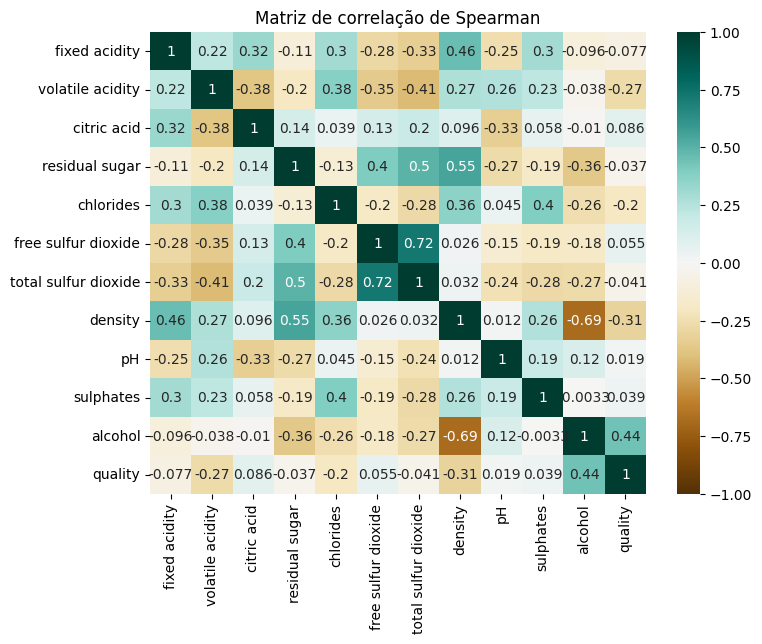

In [22]:
plt.figure(figsize = (8,6))

sns.heatmap(df_white_alt_corr,
            vmin = -1, vmax= 1, annot = True, cmap = 'BrBG')

plt.title('Matriz de correlação de Spearman')

plt.show()

**3. Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?**

In [23]:
df_white_alt.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'opinion'],
      dtype='object')

A base original traz dados sobre parâmetros químicos de diferentes vinhos, que combinados compõem uma nota de qualidade atribuída ao rótulo. Ela é composta por 13 variáveis, sendo elas: residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality'. Dessas, apenas 'quality' é uma variável discreta e as demais são contínuas. Após a manipulação do banco de dados, a coluna 'quality' foi substituída pela coluna 'opinion', que categoriza a coluna anterior em dois grupos: '0', em que a nota do vinho alcança até o número 5 e '1', em que a que a nota do vinho varia de 6 a 10. Não existem variáveis categóricas nessa base de dados.

A média e o desvio padrão das variáveis são descritas após o código abaixo:

In [24]:
df_white_alt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000
mean,6.840793,6.840793,0.334534,5.920479,0.045872,34.909698,137.248992,0.993792,3.195317,0.490403,10.588324,0.659698
std,0.865529,0.865529,0.122452,4.863415,0.023102,17.218706,43.133975,0.002905,0.151345,0.113566,1.217302,0.473870
min,3.800000,3.800000,0.000000,0.600000,0.000000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,6.300000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,0.000000
50%,6.800000,6.800000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,1.000000
75%,7.300000,7.300000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,1.000000
max,14.200000,14.200000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


**4.a) Descreva as etapas necessárias para criar um modelo de classificação eficiente.**

Separar o dataset em dois conjuntos: 'treino' e 'teste', tanto para os parâmetros que serão utilziados como entrada, quanto para os dados de saída. O conjunto  de treino será utilizado para que o modelo de classificação aprenda sobra os dados de entrada que levam aos dados de saída. Em seguida, o conjunto de parâmetros de entrada 'teste' é utilizado para que o modelo, uma vez que tenha aprendido, faça a paredição da saída. Após, a predição, os valores são comparados com o gabrito (dados de saída 'teste') e com base na taxa de acerto do modelo, podemos calcular os parâmetros de qualidade como acurácia, 'precisão', 'recall', dentre outros.
Vale ressaltar, que antes de utilizar os dados para treinar e testar o modelo, é recomendável 'normalizar' os dados, de modo que todos os dados fiquem dentro de uma mesma escala, evitando 'dar' maior peso à parâmetros com uma faixa maior de valores, do que àqueles com faixa mais reduzinda, o que poderia influenciar negativamente no aprendizado do modelo, dando resulatdos pouco precisos.

In [25]:
X = df_white_alt[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df_white_alt[['opinion']]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30, random_state= 10, stratify= y) # 30% do dados para teste

In [27]:
df_white_alt.groupby('opinion').size()

opinion
0    1351
1    2619
dtype: int64

In [28]:
len(y_train[y_train == 0]) # verificando balanceamento

2779

In [29]:
len(y_train[y_train == 1]) # verificando balanceamento

2779

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [31]:
X_train = scaler.transform(X_train)

In [32]:
X_test = scaler.transform(X_test)

**4.b - Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [34]:
yhat_LR = LR.predict(X_test)
yhat_LR

array([1, 1, 0, ..., 0, 0, 1])

In [35]:
y_proba_LR = LR.predict_proba(X_test)
y_proba_LR

array([[0.27274178, 0.72725822],
       [0.1552772 , 0.8447228 ],
       [0.72423838, 0.27576162],
       ...,
       [0.73517645, 0.26482355],
       [0.59550502, 0.40449498],
       [0.33098742, 0.66901258]])

In [36]:
import numpy as np
np.round(y_proba_LR*100.0)[0:10]

array([[27., 73.],
       [16., 84.],
       [72., 28.],
       [63., 37.],
       [44., 56.],
       [80., 20.],
       [45., 55.],
       [70., 30.],
       [38., 62.],
       [58., 42.]])

In [37]:
from sklearn.metrics import r2_score
from sklearn import metrics

print("Teste de acurácia:",metrics.accuracy_score(y_test, yhat_LR))
print("Teste de precisão:",metrics.precision_score(y_test,yhat_LR))
print("Test de recall:",metrics.recall_score(y_test,yhat_LR))

Teste de acurácia: 0.7212426532325776
Teste de precisão: 0.7683215130023641
Test de recall: 0.8269720101781171


In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
acuracias_LR = cross_val_score(LR, X_train, y_train, cv=10, scoring='accuracy')

# Calcula a média e o desvio padrão da acurácia
media_acuracia_LR = np.mean(acuracias_LR)
std_acuracia_LR = np.std(acuracias_LR)

print(f'Acurácias: {acuracias_LR}')
print(f'Média da Acurácia: {media_acuracia_LR}')
print(f'Desvio Padrão da Acurácia: {std_acuracia_LR}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Acurácias: [0.74460432 0.73021583 0.74100719 0.70503597 0.72661871 0.73381295
 0.75179856 0.72661871 0.71223022 0.71480144]
Média da Acurácia: 0.7286743890086487
Desvio Padrão da Acurácia: 0.014140243114408561


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [40]:
# Calcula a precisão para cada fold
precisoes_LR = cross_val_score(LR, X_train, y_train, cv=10, scoring='precision')

# Calcula a média e o desvio padrão da precisão
media_precisao_LR = np.mean(precisoes_LR)
std_LR = np.std(precisoes_LR)

print(f'Precisões: {precisoes_LR}')
print(f'Média da Precisão: {media_precisao_LR}')
print(f'Desvio Padrão da Precisão: {std_LR}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Precisões: [0.78       0.76213592 0.76811594 0.76165803 0.75598086 0.76847291
 0.78606965 0.76470588 0.75742574 0.74299065]
Média da Precisão: 0.7647555593969225
Desvio Padrão da Precisão: 0.01154420473692129


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
# Calcula o recall para cada fold
recalls_LR = cross_val_score(LR, X_train, y_train, cv=10, scoring='recall')

# Calcula a média e o desvio padrão do recall
media_recall_LR = np.mean(recalls_LR)
std_recall_LR = np.std(recalls_LR)

print(f'Recalls: {recalls_LR}')
print(f'Média do Recall: {media_recall_LR}')
print(f'Desvio Padrão do Recall: {std_recall_LR}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Recalls: [0.85245902 0.8579235  0.86885246 0.80327869 0.86338798 0.85245902
 0.85869565 0.84782609 0.83152174 0.86885246]
Média do Recall: 0.8505256593014968
Desvio Padrão do Recall: 0.01888610036837855


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
# Calcula o F1-score para cada fold
f1_scores_LR = cross_val_score(LR, X_train, y_train, cv=10, scoring='f1')

# Calcula a média e o desvio padrão do F1-score
media_f1_score_LR = np.mean(f1_scores_LR)
std_f1_score_LR = np.std(f1_scores_LR)

print(f'F1-scores: {f1_scores_LR}')
print(f'Média do F1-score: {media_f1_score_LR}')
print(f'Desvio Padrão do F1-score: {std_f1_score_LR}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

F1-scores: [0.81462141 0.80719794 0.81538462 0.78191489 0.80612245 0.80829016
 0.82077922 0.80412371 0.79274611 0.80100756]
Média do F1-score: 0.8052188069572171
Desvio Padrão do F1-score: 0.010796388857520751


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

**4.c- Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.**

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [44]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

In [45]:
dTree = dTree.fit(X_train,y_train)

In [46]:
yhat_dTree = dTree.predict(X_test)
yhat_dTree

array([1, 1, 0, ..., 1, 1, 1])

In [47]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat_dTree))
print("Precision Test:",metrics.precision_score(y_test,yhat_dTree))
print("Recall Test:",metrics.recall_score(y_test,yhat_dTree))

Accuracy Test: 0.7246011754827876
Precision Test: 0.7567264573991032
Recall Test: 0.8587786259541985


In [48]:
yhat_train_dTree = dTree.predict(X_train)
print("Accuracy Train:",metrics.accuracy_score(y_train, yhat_train_dTree))
print("Precision Train:",metrics.precision_score(y_train,yhat_train_dTree))
print("Recall Train:",metrics.recall_score(y_train,yhat_train_dTree))

Accuracy Train: 0.7538682979489025
Precision Train: 0.7670850767085077
Recall Train: 0.900163666121113


In [49]:
import graphviz as grp
from sklearn import tree

dot_data = tree.export_graphviz(dTree, out_file=None)
graph = grp.Source(dot_data)
graph.render("Social")#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y
from  io import StringIO
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

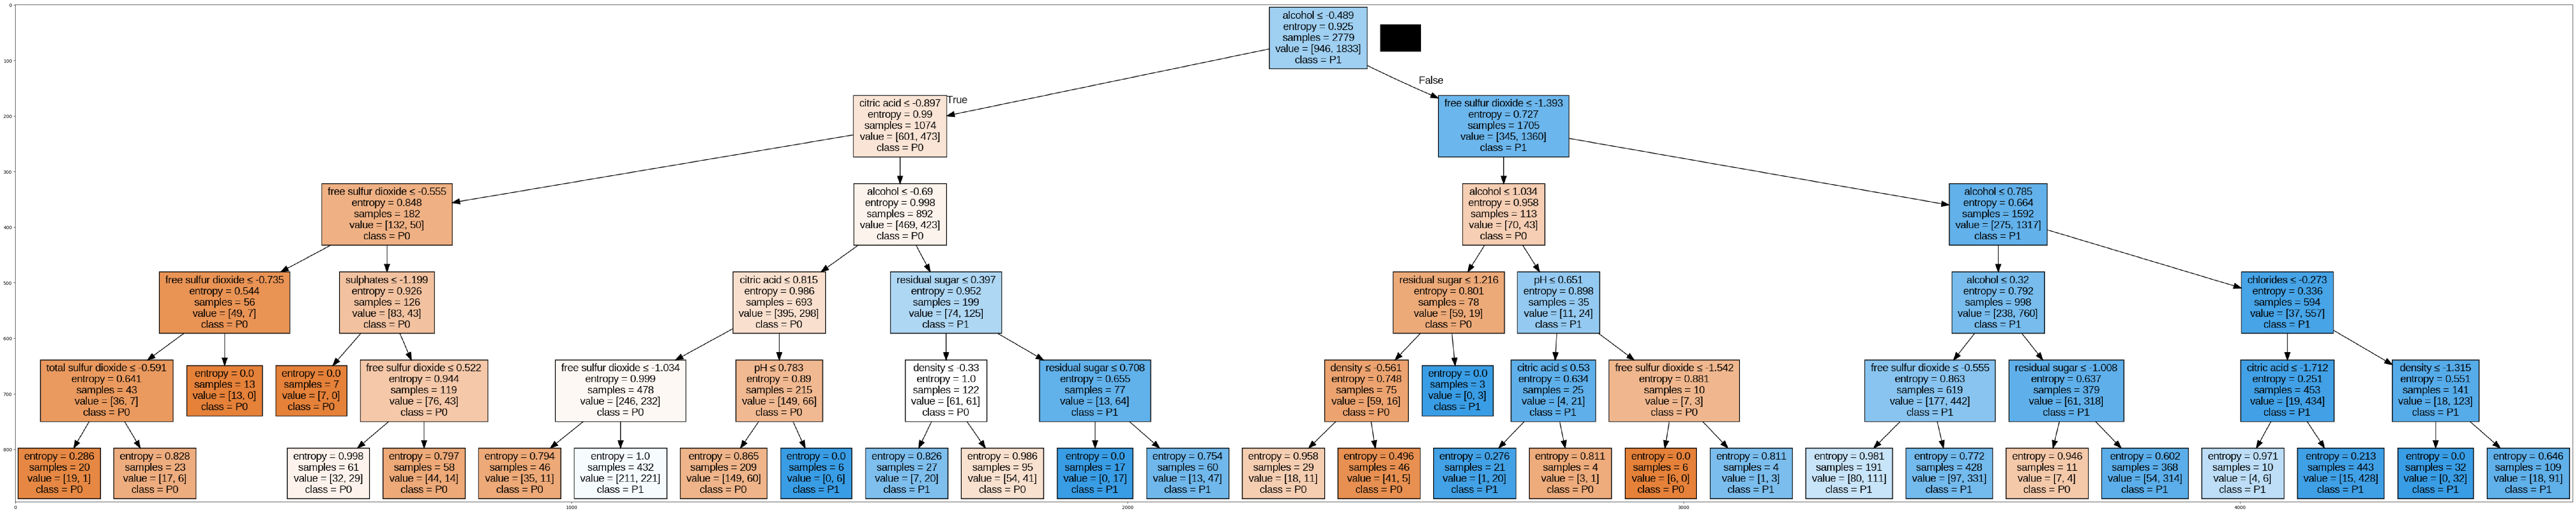

In [50]:
dot_data = StringIO()
filename = "Purchasetree.png"
featureNames = X.columns[0:11]
out=tree.export_graphviz(dTree,feature_names=featureNames, out_file=dot_data, class_names= ['P0','P1'], filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [51]:
acuracias_dTree = cross_val_score(dTree, X_train, y_train, cv=10, scoring='accuracy')

# Calcula a média e o desvio padrão da acurácia
media_acuracia_dTree = np.mean(acuracias_dTree)
std_acuracia_dTree = np.std(acuracias_dTree)

print(f'Acurácias: {acuracias_dTree}')
print(f'Média da Acurácia: {media_acuracia_dTree}')
print(f'Desvio Padrão da Acurácia: {std_acuracia_dTree}')

Acurácias: [0.73021583 0.70503597 0.71223022 0.70503597 0.69064748 0.74820144
 0.69784173 0.71942446 0.70863309 0.70758123]
Média da Acurácia: 0.7124847414487182
Desvio Padrão da Acurácia: 0.01574620634599267


In [52]:
# Calcula a precisão para cada fold
precisoes_dTree = cross_val_score(dTree, X_train, y_train, cv=10, scoring='precision')

# Calcula a média e o desvio padrão da precisão
media_precisao_dTree = np.mean(precisoes_dTree)
std_dTree = np.std(precisoes_dTree)

print(f'Precisões: {precisoes_dTree}')
print(f'Média da Precisão: {media_precisao_dTree}')
print(f'Desvio Padrão da Precisão: {std_dTree}')

Precisões: [0.74324324 0.78333333 0.7826087  0.75252525 0.72018349 0.76886792
 0.74384236 0.75238095 0.72888889 0.72767857]
Média da Precisão: 0.7503552712751269
Desvio Padrão da Precisão: 0.021113361390715707


In [53]:
# Calcula o recall para cada fold
recalls_dTree = cross_val_score(dTree, X_train, y_train, cv=10, scoring='recall')

# Calcula a média e o desvio padrão do recall
media_recall_dTree = np.mean(recalls_dTree)
std_recall_dTree = np.std(recalls_dTree)

print(f'Recalls: {recalls_dTree}')
print(f'Média do Recall: {media_recall_dTree}')
print(f'Desvio Padrão do Recall: {std_recall_dTree}')

Recalls: [0.90163934 0.7704918  0.78688525 0.81420765 0.8579235  0.89071038
 0.82608696 0.85869565 0.89130435 0.89071038]
Média do Recall: 0.8488655262532669
Desvio Padrão do Recall: 0.04468872213543968


In [54]:
# Calcula o F1-score para cada fold
f1_scores_dTree = cross_val_score(dTree, X_train, y_train, cv=10, scoring='f1')

# Calcula a média e o desvio padrão do F1-score
media_f1_score_dTree = np.mean(f1_scores_dTree)
std_f1_score_dTree = np.std(f1_scores_dTree)

print(f'F1-scores: {f1_scores_dTree}')
print(f'Média do F1-score: {media_f1_score_dTree}')
print(f'Desvio Padrão do F1-score: {std_f1_score_dTree}')

F1-scores: [0.81481481 0.7768595  0.7826087  0.78215223 0.78304239 0.82531646
 0.78350515 0.8        0.8        0.8009828 ]
Média do F1-score: 0.794928205090349
Desvio Padrão do F1-score: 0.01523239878740504


**4.d- Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.**

In [55]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [56]:
yhat_clf = clf.predict(X_test)
yhat_clf

array([1, 1, 0, ..., 0, 1, 1])

In [57]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_clf, average='weighted')

0.7504891489412705

In [58]:
print("Acurácia",metrics.accuracy_score(y_test, yhat_clf))

Acurácia 0.7556675062972292


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       405
           1       0.79      0.85      0.82       786

    accuracy                           0.76      1191
   macro avg       0.73      0.71      0.72      1191
weighted avg       0.75      0.76      0.75      1191

Confusion matrix, without normalization
[[670 116]
 [175 230]]


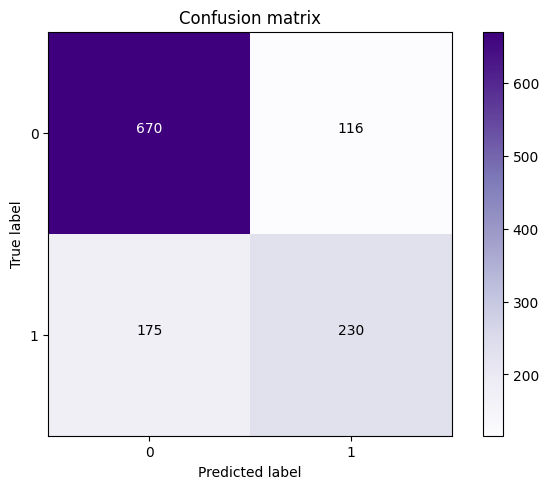

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, yhat_clf, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_clf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [61]:
acuracias_clf = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')

# Calcula a média e o desvio padrão da acurácia
media_acuracia_clf = np.mean(acuracias_clf)
std_acuracia_clf = np.std(acuracias_clf)

print(f'Acurácias: {acuracias_clf}')
print(f'Média da Acurácia: {media_acuracia_clf}')
print(f'Desvio Padrão da Acurácia: {std_acuracia_clf}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Acurácias: [0.79 0.75 0.8  0.74 0.74 0.74 0.73 0.75 0.75 0.72]
Média da Acurácia: 0.7516972703425708
Desvio Padrão da Acurácia: 0.02442708144639906


In [62]:
# Calcula a precisão para cada fold
precisoes_clf = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')

# Calcula a média e o desvio padrão da precisão
media_precisao_clf = np.mean(precisoes_clf)
std_clf = np.std(precisoes_clf)

print(f'Precisões: {precisoes_clf}')
print(f'Média da Precisão: {media_precisao_clf}')
print(f'Desvio Padrão da Precisão: {std_clf}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Precisões: [0.83 0.77 0.81 0.79 0.78 0.78 0.77 0.77 0.8  0.75]
Média da Precisão: 0.7857471448975962
Desvio Padrão da Precisão: 0.020982855024148515


In [63]:
# Calcula o recall para cada fold
recalls_clf = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall')

# Calcula a média e o desvio padrão do recall
media_recall_clf = np.mean(recalls_clf)
std_recall_clf = np.std(recalls_clf)

print(f'Recalls: {recalls_clf}')
print(f'Média do Recall: {media_recall_clf}')
print(f'Desvio Padrão do Recall: {std_recall_clf}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Recalls: [0.87 0.87 0.9  0.82 0.86 0.85 0.85 0.88 0.84 0.85]
Média do Recall: 0.8581640532192919
Desvio Padrão do Recall: 0.0217814881086997


In [64]:
# Calcula o F1-score para cada fold
f1_scores_clf = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')

# Calcula a média e o desvio padrão do F1-score
media_f1_score_clf = np.mean(f1_scores_clf)
std_f1_score_clf = np.std(f1_scores_clf)

print(f'F1-scores: {f1_scores_clf}')
print(f'Média do F1-score: {media_f1_score_clf}')
print(f'Desvio Padrão do F1-score: {std_f1_score_clf}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

F1-scores: [0.85 0.82 0.85 0.8  0.82 0.81 0.81 0.82 0.82 0.8 ]
Média do F1-score: 0.8201563603226285
Desvio Padrão do F1-score: 0.017064073180021462


**5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.**

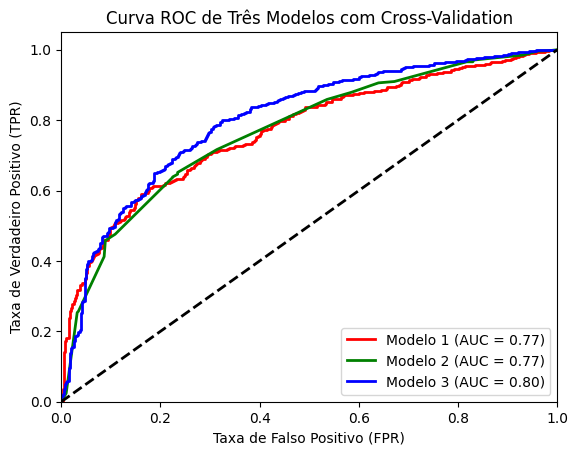

In [65]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedGroupKFold
from itertools import cycle

# Supondo que você tenha três modelos treinados anteriormente
modelo1 = LR
modelo2 = dTree
modelo3 = clf

# Binariza as classes usando label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Função para calcular e plotar a curva ROC para um modelo específico
def plot_roc_curve(modelo, nome_modelo, color):
  if hasattr(modelo, "decision_function"):
     y_score = modelo.decision_function(X_test)
  elif hasattr(modelo, "predict_proba"):
      prob_pos = modelo.predict_proba(X_test)[:, 1]
      y_score = prob_pos
  else:
     raise AttributeError("Modelo não possui 'decision_function' nem 'predict_proba'")

  fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color=color, lw=2, label=f'{nome_modelo} (AUC = {roc_auc:.2f})')
  # Cores para os modelos
cores = cycle(['red', 'green', 'blue'])

# Plota a curva ROC para cada modelo
plot_roc_curve(modelo1, 'Modelo 1', next(cores))
plot_roc_curve(modelo2, 'Modelo 2', next(cores))
plot_roc_curve(modelo3, 'Modelo 3', next(cores))

# Configurações do gráfico
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC de Três Modelos com Cross-Validation')
plt.legend(loc="lower right")
plt.show()

Diante do resultado obtido acima, foi observado que o melhor modelo a ser usado é o SVM, que apresenta AUC = 0,80, em comparação com os outros dois modelos testados (Regressão linear e Árvore de decisão, ambos com AUC =0,77). Essa medida expressa a área sob a curva e é uma métrica de avaliação em machine learning usada para avaliar o desempenho de modelos de classificação. Ela resume a curva ROC em um único valor, uma vez que a curva ROC mostra a eficiência do modelo de classificação criado em distinguir duas categorias através de dois parâmetros:

1) Taxa de verdadeiro positivo
2) Taxa de falso positivo

O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Dessa forma, valores acima desse limite mostram que o algoritmo classifica uma entrada em uma classe do binômio e abaixo dessa valor, na outra classe. Em um modelo com AUC = 0, 100% das previões são equivocadas, por outro lado, modelos = 1 , tem 100% das previões corretas. Desta forma, quanto maior o valor de AUC, maior a precisão do modelo. Assim, o modelo SVM foi o modelo com melhor desempenho de classifcação dentre os três testados.

**6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.**

In [66]:
df_red = df[df['type'] == 'red']

In [67]:
df_red.shape

(1599, 13)

In [68]:
#### Verifica se tem duplicatas no Dataframe
df_red[df_red.duplicated()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4902,red,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4909,red,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
4925,red,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
4938,red,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
4963,red,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,red,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [69]:
df_red.drop_duplicates(inplace= True)

<ipython-input-69-ca30565bc62c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red.drop_duplicates(inplace= True)


In [70]:
df_red.shape

(1359, 13)

In [71]:
df_red['opinion'] = df_red['quality'].apply(lambda x: 0 if x <= 5 else 1)

<ipython-input-71-48d62dff8f4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['opinion'] = df_red['quality'].apply(lambda x: 0 if x <= 5 else 1)


In [72]:
df_red.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4903,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [73]:
df_red.groupby('type').size()

type
red    1359
dtype: int64

In [74]:
df_red_alt = df_red.drop('quality', axis=1)

In [75]:
df_red_alt.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4903,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [76]:
df_red_alt.isna().sum()

type                    0
fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
opinion                 0
dtype: int64

In [77]:
#### Substituir os valores vazios das colunas pela média dos valores contidos em cada coluna
df_red_alt['fixed acidity'] = df_red_alt['fixed acidity'].fillna(df_red_alt['fixed acidity'].mean().round(1))
df_red_alt['volatile acidity'] = df_red_alt['fixed acidity'].fillna(df_red_alt['volatile acidity'].mean().round(1))
df_red_alt['citric acid'] = df_red_alt['citric acid'].fillna(df_red_alt['citric acid'].mean().round(1))
df_red_alt['pH'] = df_red_alt['pH'].fillna(df_red_alt['pH'].mean().round(1))
df_red_alt['sulphates'] = df_red_alt['sulphates'].fillna(df_red_alt['sulphates'].mean().round(1))

In [78]:
df_red_alt.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
opinion                 0
dtype: int64

In [79]:
df_red_alt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.313466,8.313466,0.272553,2.523400,0.088124,15.893304,46.825975,0.996709,3.309478,0.658683,10.432315,0.529065
std,1.735331,1.735331,0.195398,1.352314,0.049377,10.447270,33.408946,0.001869,0.154807,0.170652,1.082065,0.499338
min,4.600000,4.600000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,7.100000,0.095000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,7.900000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,1.000000
75%,9.200000,9.200000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,1.000000
max,15.900000,15.900000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [80]:
df_red_alt_corr = df.corr()

<ipython-input-80-86b24299b06f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_red_alt_corr = df.corr()


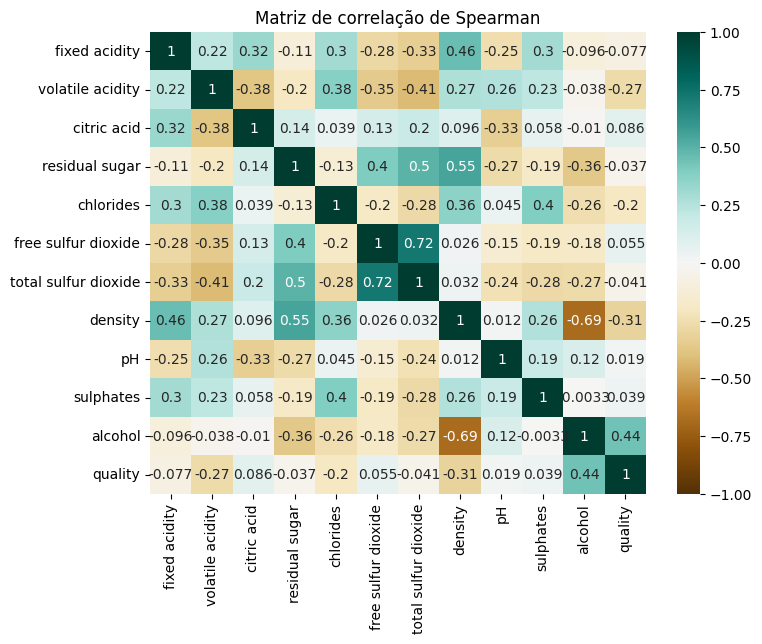

In [81]:
plt.figure(figsize = (8,6))

sns.heatmap(df_red_alt_corr,
            vmin = -1, vmax= 1, annot = True, cmap = 'BrBG')

plt.title('Matriz de correlação de Spearman')

plt.show()

In [82]:
df_red_alt.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'opinion'],
      dtype='object')

In [83]:
K = df_red_alt[df_red_alt.columns[1:12]]
z = df_red_alt[df_red_alt.columns[-1]]

In [84]:
df_red_alt.groupby('opinion').size()

opinion
0    640
1    719
dtype: int64

Modelo SVM

In [85]:
K = scaler.transform(K)

In [86]:
yhat_clf_red = clf.predict(K)
yhat_clf_red

array([0, 0, 0, ..., 1, 1, 1])

In [87]:
from sklearn.metrics import f1_score
f1_score(z, yhat_clf_red, average='weighted')

0.4946768891263792

In [88]:
print("Acurácia",metrics.accuracy_score(z, yhat_clf_red))

Acurácia 0.5423105224429727


In [89]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

              precision    recall  f1-score   support

           0       0.51      0.88      0.64       640
           1       0.69      0.25      0.36       719

    accuracy                           0.54      1359
   macro avg       0.60      0.56      0.50      1359
weighted avg       0.60      0.54      0.49      1359

Confusion matrix, without normalization
[[177 542]
 [ 80 560]]


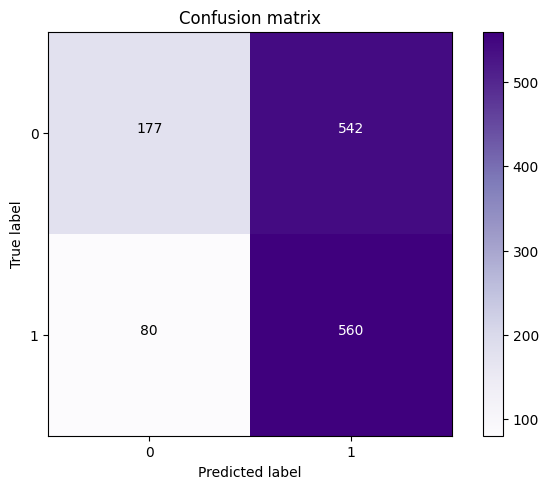

In [90]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(z, yhat_clf_red, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(z, yhat_clf_red))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [91]:
print("Accuracy Test:",metrics.accuracy_score(z, yhat_clf_red))
print("Precision Test:",metrics.precision_score(z,yhat_clf_red))
print("Recall Test:",metrics.recall_score(z,yhat_clf_red))
print("f1-score Test:",metrics.f1_score(z,yhat_clf_red, average='weighted'))

Accuracy Test: 0.5423105224429727
Precision Test: 0.688715953307393
Recall Test: 0.24617524339360222
f1-score Test: 0.4946768891263792


Curva ROC

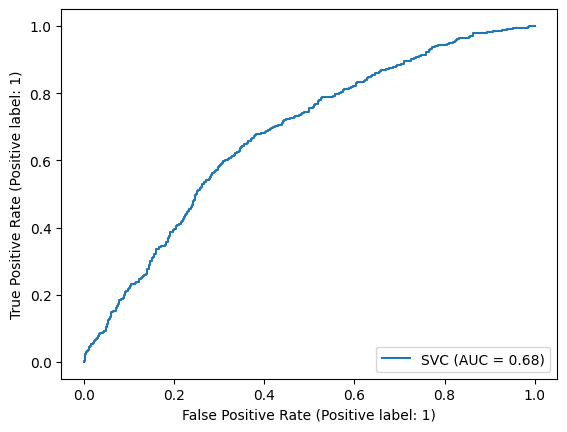

In [92]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
RocCurveDisplay.from_estimator(clf, K, z)
plt.show()

O modelo SVM treinado com a base de dados que contém apenas os parâmetros de classificação dos vinhos brancos não funciona com a mesma eficiência para vinhos tintos. A métrica AUC obtida para o modelo alplicado aos dados de vinho tinto é de 0,68; ou seja, 12% menos eficiente na classificação das entradas.